In [1]:
import numpy as np

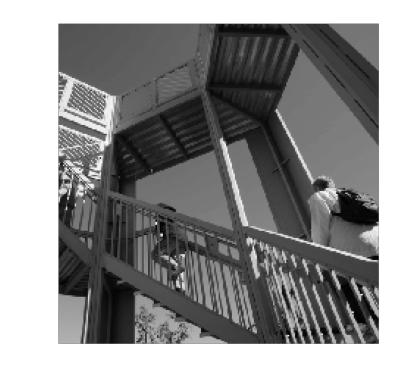

In [2]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
url = 'https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/edb460dd5397f7f4_856.png'
i = imageio.imread(url)
plt.gray()
plt.imshow(i)
plt.axis('off')
plt.show()


In [3]:
if len(i.shape) == 3:
    img = np.dot(i[..., :3], [0.299, 0.587, 0.114])  # RGB to grayscale
# Convert to int32 for safe calculations with negatives
i = img.astype(np.int32)
i_transformed = np.copy(i)

size_x = i.shape[0]
size_y = i.shape[1]

In [4]:
# A convolution is a filter that passes over an image, processes it, and extracts the important features.
# In order for your program to "see" the image as a sneaker, you'll have to extract the important features, 
# and blur the inessential features. This is called feature mapping.

In [5]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [6]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

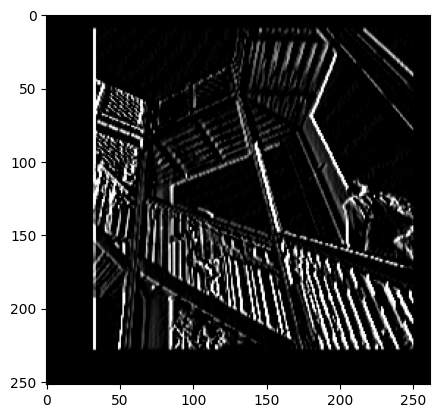

In [7]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

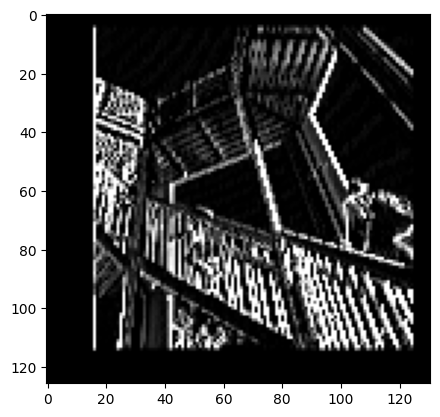

In [8]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()